# EPA1352 - Assignment 3: Data Cleaning

before running the notebook, please check that the necessary input files are given and that have a correctly defined directory, and that output files are saved to the correct directory.

Input files: 
- \_roads3.csv
- BMMS_overview.xlsx
- n1n2_intersectionpoints.csv
- n1n2_andsideroads.csv

Output files:
- semicleaned_data.csv
- nearlycleaned_data.xlsx

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 1. Processing Roads Data

### 1.1. Load roads data

In [2]:
roads_file = "_roads3.csv" # !!! check path
all_roads_data = pd.read_csv(roads_file)

print("all roads shape:", all_roads_data.shape)
all_roads_data.head(3)

all roads shape: (51348, 8)


,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101


### 1.2. Select N1 and N2 roads

In [3]:
# indexes are reset in order for nested for-loops to work later on
N1_roads_data = all_roads_data.loc[all_roads_data.road == "N1"]
N1_roads_data.reset_index(inplace=True)
N2_roads_data = all_roads_data.loc[all_roads_data.road == "N2"]
N2_roads_data.reset_index(inplace=True)

print("the N1 has", N1_roads_data.shape[0], "entries")
print("the N2 has", N2_roads_data.shape[0], "entries")

the N1 has 1339 entries
the N2 has 886 entries


### 1.3. Select remaining entries

In [4]:
noN1_roads_data = all_roads_data.loc[all_roads_data.road != "N1"]
remaining_roads_data = noN1_roads_data.loc[all_roads_data.road != "N2"]
remaining_roads_data.reset_index(inplace=True)

print("remainding entries:", remaining_roads_data.shape)

remainding entries: (49123, 9)


### 1.4. Finding the Sideroads
1. in excel we selected entries from the N1 & N2 which contained "SideRoad or Crossroad" in the column "type". This resulted in the file "n1n2_intersectionpoints.csv"
1. in description of each intersection was specfied in the "name" column, this also specified the road with which it intersected, though there were some inconsistencies
1. For this reason the road names that were mentioned were manually selected and written in a list. 
1. Looping over this list, one could determine the length of each road

In [5]:
intersections_file = "n1n2_intersectionpoints.csv" # !!! check path
intersections_data = pd.read_csv(intersections_file, sep=";")
intersections_data.head()

,road,chainage,lrp,lat,lon,gap,type,name
0,N1,822,LRPSb,237027778.0,904504722.0,NaN,CrossRoad,Intersection with Z1101
1,N1,4175,LRP004a,236938052.0,904805271.0,NaN,"SideRoad,Right",Road to Narayanganj(R111)
2,N1,7181,LRP007a,236979163.0,905092778.0,NaN,CrossRoad,"R110,Left to Demra, Right to Narayanganj"
3,N1,8763,LRP009a,237060833.0,905215271.0,NaN,"SideRoad,Left",Road to Sylhet (N2)
4,N1,11936,LRP012c,236904163.0,90546583.0,NaN,"SideRoad,Right",Right to Syedpur (R113) left to Joydebpur N105)


In [6]:
# All sideroads mentioned in the descriptions of N1 entries:
list_of_N1_sideroads = ["Z1133", "Z1504", "Z1009", 
                        "N110", "N109", "Z1001", "Z1131", "Z1130", "Z1005", "R172", "Z1127", 
                        "Z1126", "Z1002", "Z1125", "Z1124", "Z1007", "R171", "Z1013", "Z1019", 
                        "N108", "Z1036", "Z1026", "Z1039", "R170", "Z1057", "Z1059", "N107", 
                        "Z1070", "Z1071", "Z1018", "Z1065", "Z1804", "N111", "Z1016", "Z1087", 
                        "Z1086", "Z1021", "R151", "Z1032", "Z1081", "Z1034", "N104", "Z1030", 
                        "Z1031", "Z1048", "Z1045", "Z1046", "Z1052", "Z1029", "N102", "Z1219", 
                        "Z1028", "Z1022", "Z1008", "Z1017", "Z1042", "Z1044", "Z1053", "Z1402", 
                        "Z1062", "Z1063", "Z1066", "Z1061", "R113", "N105", "R110", "R111", "Z1101"]
# faulty roads: Z1503
# this road was mentioned in an entry, but road does not exist in original dataset

# loop over list and determine length of road by looking at chainage in original dataset
list_of_long_N1_sideroads = []

for sideroad in list_of_N1_sideroads:
    sideroad_entries = remaining_roads_data.loc[remaining_roads_data.road == sideroad]
    sideroad_entries.reset_index(inplace=True)
    
    if sideroad_entries.chainage.iloc[-1] > 25:
        list_of_long_N1_sideroads.append(sideroad)

list_of_long_N1_sideroads

['Z1005',
 'Z1124',
 'R170',
 'Z1065',
 'R151',
 'Z1034',
 'N104',
 'Z1031',
 'Z1048',
 'N102',
 'Z1042',
 'Z1044',
 'Z1402',
 'N105']

In [7]:
# All sideroads mentioned in the descriptions of N2 entries:
list_of_N2_sideroads = ["Z2012", "Z2011", "N210", "N206", "N209", "N208", "Z2013", 
                        "R283", "Z2016", "N207", "R241", "R240", "N207", "R240", "N204", 
                        "R221", "N204", "R220", "N102", "Z2031", "R360", "Z2032", "Z2041", 
                        "Z2042", "R310", "R211", "R210", "R301", "Z2047", "Z2038", 
                        "R203", "N105", "R202", "R201"]

# faulty roads: Z2022, Z2033, Z1090
# these road were mentioned in some entries, but roads do not exist in original dataset

# loop over list and determine length of road by looking at chainage in original dataset
list_of_long_N2_sideroads = []

for sideroad in list_of_N2_sideroads:
    sideroad_entries = remaining_roads_data.loc[remaining_roads_data.road == sideroad]
    sideroad_entries.reset_index(inplace=True)
    
    if sideroad_entries.chainage.iloc[-1] > 25:
        list_of_long_N2_sideroads.append(sideroad)

list_of_long_N2_sideroads

['N208',
 'Z2013',
 'N207',
 'R241',
 'R240',
 'N207',
 'R240',
 'N204',
 'N204',
 'R220',
 'N102',
 'R360',
 'R310',
 'R211',
 'R301',
 'R203',
 'N105']

In [8]:
# make a list with all road names (N1, N2 and sideroads >25km)
road_names = list_of_long_N1_sideroads + list_of_long_N2_sideroads

# remove duplicates (sideroads that intersect both N1 & N2)
A3_road_names = []
for i in road_names: 
    if i not in A3_road_names: 
        A3_road_names.append(i) 
A3_road_names.append("N1")
A3_road_names.append("N2")
A3_road_names.sort()
A3_road_names

['N1',
 'N102',
 'N104',
 'N105',
 'N2',
 'N204',
 'N207',
 'N208',
 'R151',
 'R170',
 'R203',
 'R211',
 'R220',
 'R240',
 'R241',
 'R301',
 'R310',
 'R360',
 'Z1005',
 'Z1031',
 'Z1034',
 'Z1042',
 'Z1044',
 'Z1048',
 'Z1065',
 'Z1124',
 'Z1402',
 'Z2013']

### 1.5. Select the all entries of N1, N2 and long sideroads in Excel
1. in excel we selected entries located on each road mentioned in the list "A3_road_names". This resulted in the file "n1n2_andsideroads.csv"
1. these were plotted to get a first impression of the network

In [9]:
#using the lists, a csv file was created in excel that filtered out entries specifically
A3_roads_file = "n1n2_andsideroads.csv" # !!! check path
A3_roads_data = pd.read_csv(A3_roads_file, delimiter=";")

print("roads data shape:", A3_roads_data.shape)
A3_roads_data.head()

roads data shape: (5579, 8)


,road,chainage,lrp,lat,lon,gap,type,name
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing


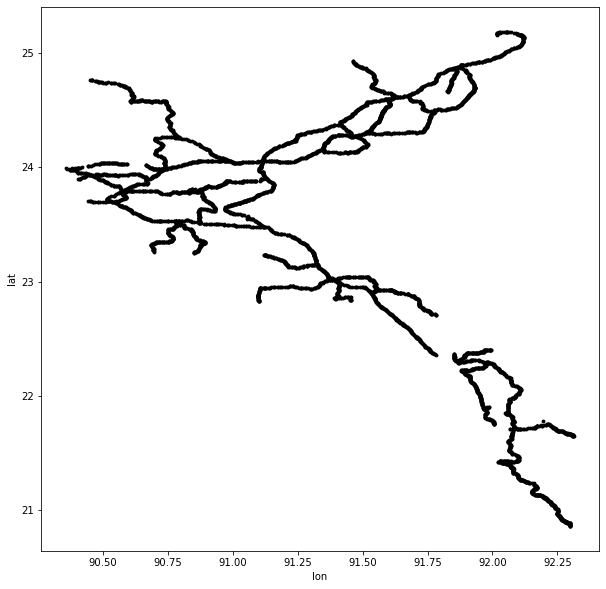

In [10]:
ax1 = A3_roads_data.plot.scatter("lon", "lat", s=8, c="black", figsize=(10,10))

### 1.6. Calculate and define length and model_type columns

In [11]:
# length is the difference in chainage of one entry to the next for each road

length_column = []
for road in A3_road_names: 
    road_points = A3_roads_data.loc[A3_roads_data.road == road]
    
    # for road data calculate length using chainage
    road_points.reset_index(inplace=True, drop=True)
    num_of_rows = len(road_points.chainage)-1
    
    # for loops generates list to contain values for new column named "length"
    # length values calculated based on difference in chainage
    for i in range(num_of_rows):
        length_of_LRP = road_points.chainage[i+1] - road_points.chainage[i]
        length_column.append(length_of_LRP*1000)

    # since length is calculated using the subsequent entry, last entry will not have length
    # for pragmatic purposes this is simply assumed to have length of 100m
    length_column.append(0)

# add "length" column to roads dataframe
A3_roads_data["length"] = length_column
A3_roads_data.head()

# for now define each model_type as Link, since it is the common
A3_roads_data["model_type"] = "Link"

### 1.7. Format roads data

In [12]:
# select correct columns so that it can be merged with bridges data
A3_roads_data_formatted = A3_roads_data[["road","lrp","model_type","name","lat","lon","length", "type"]]
print("roads data shape:", A3_roads_data_formatted.shape)
A3_roads_data_formatted.head()

roads data shape: (5579, 8)


,road,lrp,model_type,name,lat,lon,length,type
0,N1,LRPS,Link,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,814.0,Others
1,N1,LRPSa,Link,Box Culvert,23.702917,90.450417,8.0,Culvert
2,N1,LRPSb,Link,Intersection with Z1101,23.702778,90.450472,178.0,CrossRoad
3,N1,LRP001,Link,Km post missing,23.702139,90.451972,1000.0,KmPost
4,N1,LRP002,Link,Km post missing,23.697889,90.460583,130.0,KmPost


## 2. Processing Bridges Data and Merging

### 2.1. Load and format bridges data

In [13]:
bridges_file = 'BMMS_overview.xlsx'
bridges_data = pd.read_excel('BMMS_overview.xlsx') # !!! check path

# select and rename columns appropriately so that it can be merged with roads data
bridges_data.rename(columns={"LRPName": "lrp"}, inplace=True)
bridges_data["model_type"] = "Bridge"
bridges_data_formatted = bridges_data[["road","lrp","model_type","name","lat","lon","length","type","condition"]]
print("all bridges shape:", bridges_data_formatted.shape)
bridges_data_formatted.head()

all bridges shape: (20415, 9)


,road,lrp,model_type,name,lat,lon,length,type,condition
0,N1,LRP001a,Bridge,.,23.698739,90.458861,11.30,Box Culvert,A
1,N1,LRP004b,Bridge,.,23.694664,90.487775,6.60,Box Culvert,A
2,N1,LRP008b,Bridge,Kanch pur Bridge.,23.705060,90.523214,394.23,PC Girder Bridge,A
3,N1,LRP010b,Bridge,NOYAPARA CULVERT,23.694391,90.537574,6.30,Box Culvert,A
4,N1,LRP010c,Bridge,ADUPUR CULVERT,23.694302,90.537707,6.30,Box Culvert,A


### 2.2. Merge roads and bridges data for each Road
1. Select roads and bridges data from the same road
1. Order entries according to their LRP
1. Define SourceSinks
1. Remove duplicates based on location

In [14]:
# initialise one big data set to combine roads and bridges data
columns = ["road","lrp","model_type","name","lat","lon","length","type","condition"]
grand_data = pd.DataFrame(columns=columns)

for road in A3_road_names:
    # selecting roads and bridges on the corresponding roads
    road_points = A3_roads_data_formatted.loc[A3_roads_data_formatted.road == road]
    bridge_points = bridges_data_formatted.loc[bridges_data_formatted.road == road]
    merge_data = [road_points, bridge_points]
    road_and_bridge_points = pd.concat(merge_data) 
    
    # order roads and bridges on the same road
    # ordering by LRP results in starting LRPs (LRPS_ ...) to go at the end
    # therefore these need to sliced off first and concatenated at the end
    road_and_bridge_points.sort_values(by='lrp', ascending=True, inplace=True)
    starting_lrps = road_and_bridge_points[road_and_bridge_points["lrp"].str.contains("LRPS")]
    
    starting_lrps_len = len(starting_lrps)
    if len(starting_lrps) > 0:
        remaining_lrps = road_and_bridge_points[0:-starting_lrps_len]
    
    merge_data = [starting_lrps, remaining_lrps]
    road_and_bridge_points_ordered = pd.concat(merge_data)
    
    #give first and last entries model_type = SourceSink
    road_and_bridge_points_ordered["model_type"].iloc[0] = "SourceSink"
    road_and_bridge_points_ordered["model_type"].iloc[-1] = "SourceSink"
    
    #add the ordered data to the grand data frame
    merge_data = [grand_data, road_and_bridge_points_ordered]
    grand_data = pd.concat(merge_data)    

# remove duplicates based on identical coordinates and model_type
grand_data.drop_duplicates(subset=["lat", "lon", "model_type"], inplace=True)

# save grand data
grand_data.to_csv("semicleaned_data.csv", index=False) # !!! check path

### 2.4. Give each entry a unique ID

In [15]:
grand_data_2 = grand_data
grand_data_2.reset_index(inplace=True, drop=True)
grand_data_2.reset_index(inplace=True)

grand_data_2.rename(columns={"index": "id"}, inplace=True)
grand_data_2.head()

grand_data_3 = grand_data_2[["road","id","model_type","name","lat","lon","length","type","condition"]]
print("total entries:", grand_data_3.shape)
grand_data_3.head()

total entries: (7927, 9)


,road,id,model_type,name,lat,lon,length,type,condition
0,N1,0,SourceSink,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,814.0,Others,NaN
1,N1,1,Link,Box Culvert,23.702917,90.450417,8.0,Culvert,NaN
2,N1,2,Link,Intersection with Z1101,23.702778,90.450472,178.0,CrossRoad,NaN
3,N1,3,Link,Km post missing,23.702139,90.451972,1000.0,KmPost,NaN
4,N1,4,Bridge,.,23.698739,90.458861,11.3,Box Culvert,A


## 3. Finding the Intersections

### 3.1. Removing N1 and N2 from roads list
this is done as the algorithm is based on substring detection.
e.g. if R151 were to intersect with N240, the alogrithm detects it as an intersection with N2, since N240 contains the substring "N2"

In [16]:
# define list without N1 & N2
A3_side_roads = ['N102', 'N104', 'N105', 'N204', 'N207', 'N208', 'R151', 
                 'R170', 'R203', 'R211', 'R220', 'R240', 'R241', 'R301', 
                 'R310', 'R360', 'Z1005', 'Z1031', 'Z1034', 'Z1042', 'Z1044', 
                 'Z1048', 'Z1065', 'Z1124', 'Z1402', 'Z2013']

### 3.2. Find the intersection points on corresponding roads and make their lon, lat and id match

In [17]:
# for each road (including N1 and N2)...
for road in A3_road_names:
    road_points = grand_data_3.loc[grand_data_3.road == road]
    
    #... loop over all CrossRoad/SideRoad entries...
    for index, row in road_points.iterrows():
        
        # ... check if their description mentions a sideroad...
        if ("CrossRoad" in row["type"]) or ("SideRoad" in row["type"]) or (row["model_type"] == "SourceSink"):
            for intersect in A3_side_roads:
                
                #... if found we know there is an intersection between both roads.
                if (intersect in row["name"]) and (road != intersect):
                    print(road, "intersects", intersect, "at index:", row["id"])
                    
                    # both roads must have a corresponding entry that refers to the same intersection
                    entry_1 = row
                    entry_2 = grand_data_3.loc[(grand_data_3.road == intersect) &
                                               (grand_data_3["name"].str.contains(road))]
        
                    # if one corresponding entry is found, it can be modified to make entries match, in id, lon, lat
                    if (entry_2.shape[0] == 1):
                        print("corresponding entry processed at:",entry_2.id.iloc[0], "\n")
                        id_1 = row.id
                        id_2 = entry_2.id.iloc[0]
                        
                        grand_data_3.at[id_1, 'model_type'] = "Intersection"
                        grand_data_3.at[id_2, 'model_type'] = "Intersection"
                        grand_data_3.at[id_2, "lat"] = grand_data_3.lat[id_1]
                        grand_data_3.at[id_2, "lon"] = grand_data_3.lon[id_1]
                        grand_data_3.at[id_2, "id"] = grand_data_3.id[id_1]
                    
                    # if there are too many corresponding entries found, we manually checked each potential entry
                    # this occurs in the cases of N1 and N2, as substring detection finds descriptions 
                    # that actually refer to N1XX / N2XX instead
                    elif (entry_2.shape[0] > 1):
                        print("!!! ERROR: multiple corresponding entry found:", entry_2.shape[0], "entries")
                        for i in entry_2.id:
                            print("potential id:", i)
                        print("\n", end="")
                    # if there is no corresponding entry found, we manually checked all entries of the intersecting road
                    # this occurs in cases where data does not follow the convention and an entry has a name such as:
                    # "intersection with N 208" or "start of road at N-2", substring detection fails in these cases
                    elif (entry_2.shape[0] < 1):
                        print("!!! ERROR: no corresponding entry found")
                        print("error at:", row["id"], "\n")
    
grand_data_3.to_excel("nearlycleaned_data.xlsx", index=False) # !!! check path                                                         

N1 intersects N105 at index: 38
corresponding entry processed at: 2439 

N1 intersects Z1402 at index: 164
corresponding entry processed at: 7832 

N1 intersects Z1044 at index: 169
corresponding entry processed at: 7214 

N1 intersects Z1042 at index: 191
corresponding entry processed at: 7051 

N1 intersects N102 at index: 251
!!! ERROR: multiple corresponding entry found: 2 entries
potential id: 1967
potential id: 2243

N1 intersects Z1048 at index: 393
corresponding entry processed at: 7535 

N1 intersects Z1031 at index: 437
!!! ERROR: multiple corresponding entry found: 4 entries
potential id: 6826
potential id: 6828
potential id: 6829
potential id: 6841

N1 intersects Z1031 at index: 439
!!! ERROR: multiple corresponding entry found: 4 entries
potential id: 6826
potential id: 6828
potential id: 6829
potential id: 6841

N1 intersects N104 at index: 454
!!! ERROR: no corresponding entry found
error at: 454 

N1 intersects Z1034 at index: 463
!!! ERROR: multiple corresponding entry

In [18]:
grand_data_3.condition.value_counts() # for the report

A    1475
C     411
B     405
D      57
Name: condition, dtype: int64